# House Price Prediction with Linear Regression 
### Link : https://www.kaggle.com/ayushpoojari/house-price-prediction

![](https://www.holidify.com/images/bgImages/MUMBAI.jpg)

## Imports 

In [1]:
import pandas as pd
import numpy as np
import os 
import sklearn

## Dataset Loading

In [2]:
df = pd.read_csv('../input/housing-prices-in-mumbai/Mumbai1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [4]:
df.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(f'The given dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The given dataset contains 6347 rows and 19 columns


In [6]:
df.head(4)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [7]:
df.tail(4)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6346,6346,2750000,700,Badlapur East,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1


## Dataset Cleaning

In [8]:
df.isna()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [10]:
print(df.isnull().any())

Unnamed: 0              False
Price                   False
Area                    False
Location                False
No. of Bedrooms         False
New/Resale              False
Gymnasium               False
Lift Available          False
Car Parking             False
Maintenance Staff       False
24x7 Security           False
Children's Play Area    False
Clubhouse               False
Intercom                False
Landscaped Gardens      False
Indoor Games            False
Gas Connection          False
Jogging Track           False
Swimming Pool           False
dtype: bool


### The given dataset does not have any null data.

## Step 1- Exploratory Analysis and Visualization
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/07/Data-Exploration.jpg" width="480">

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

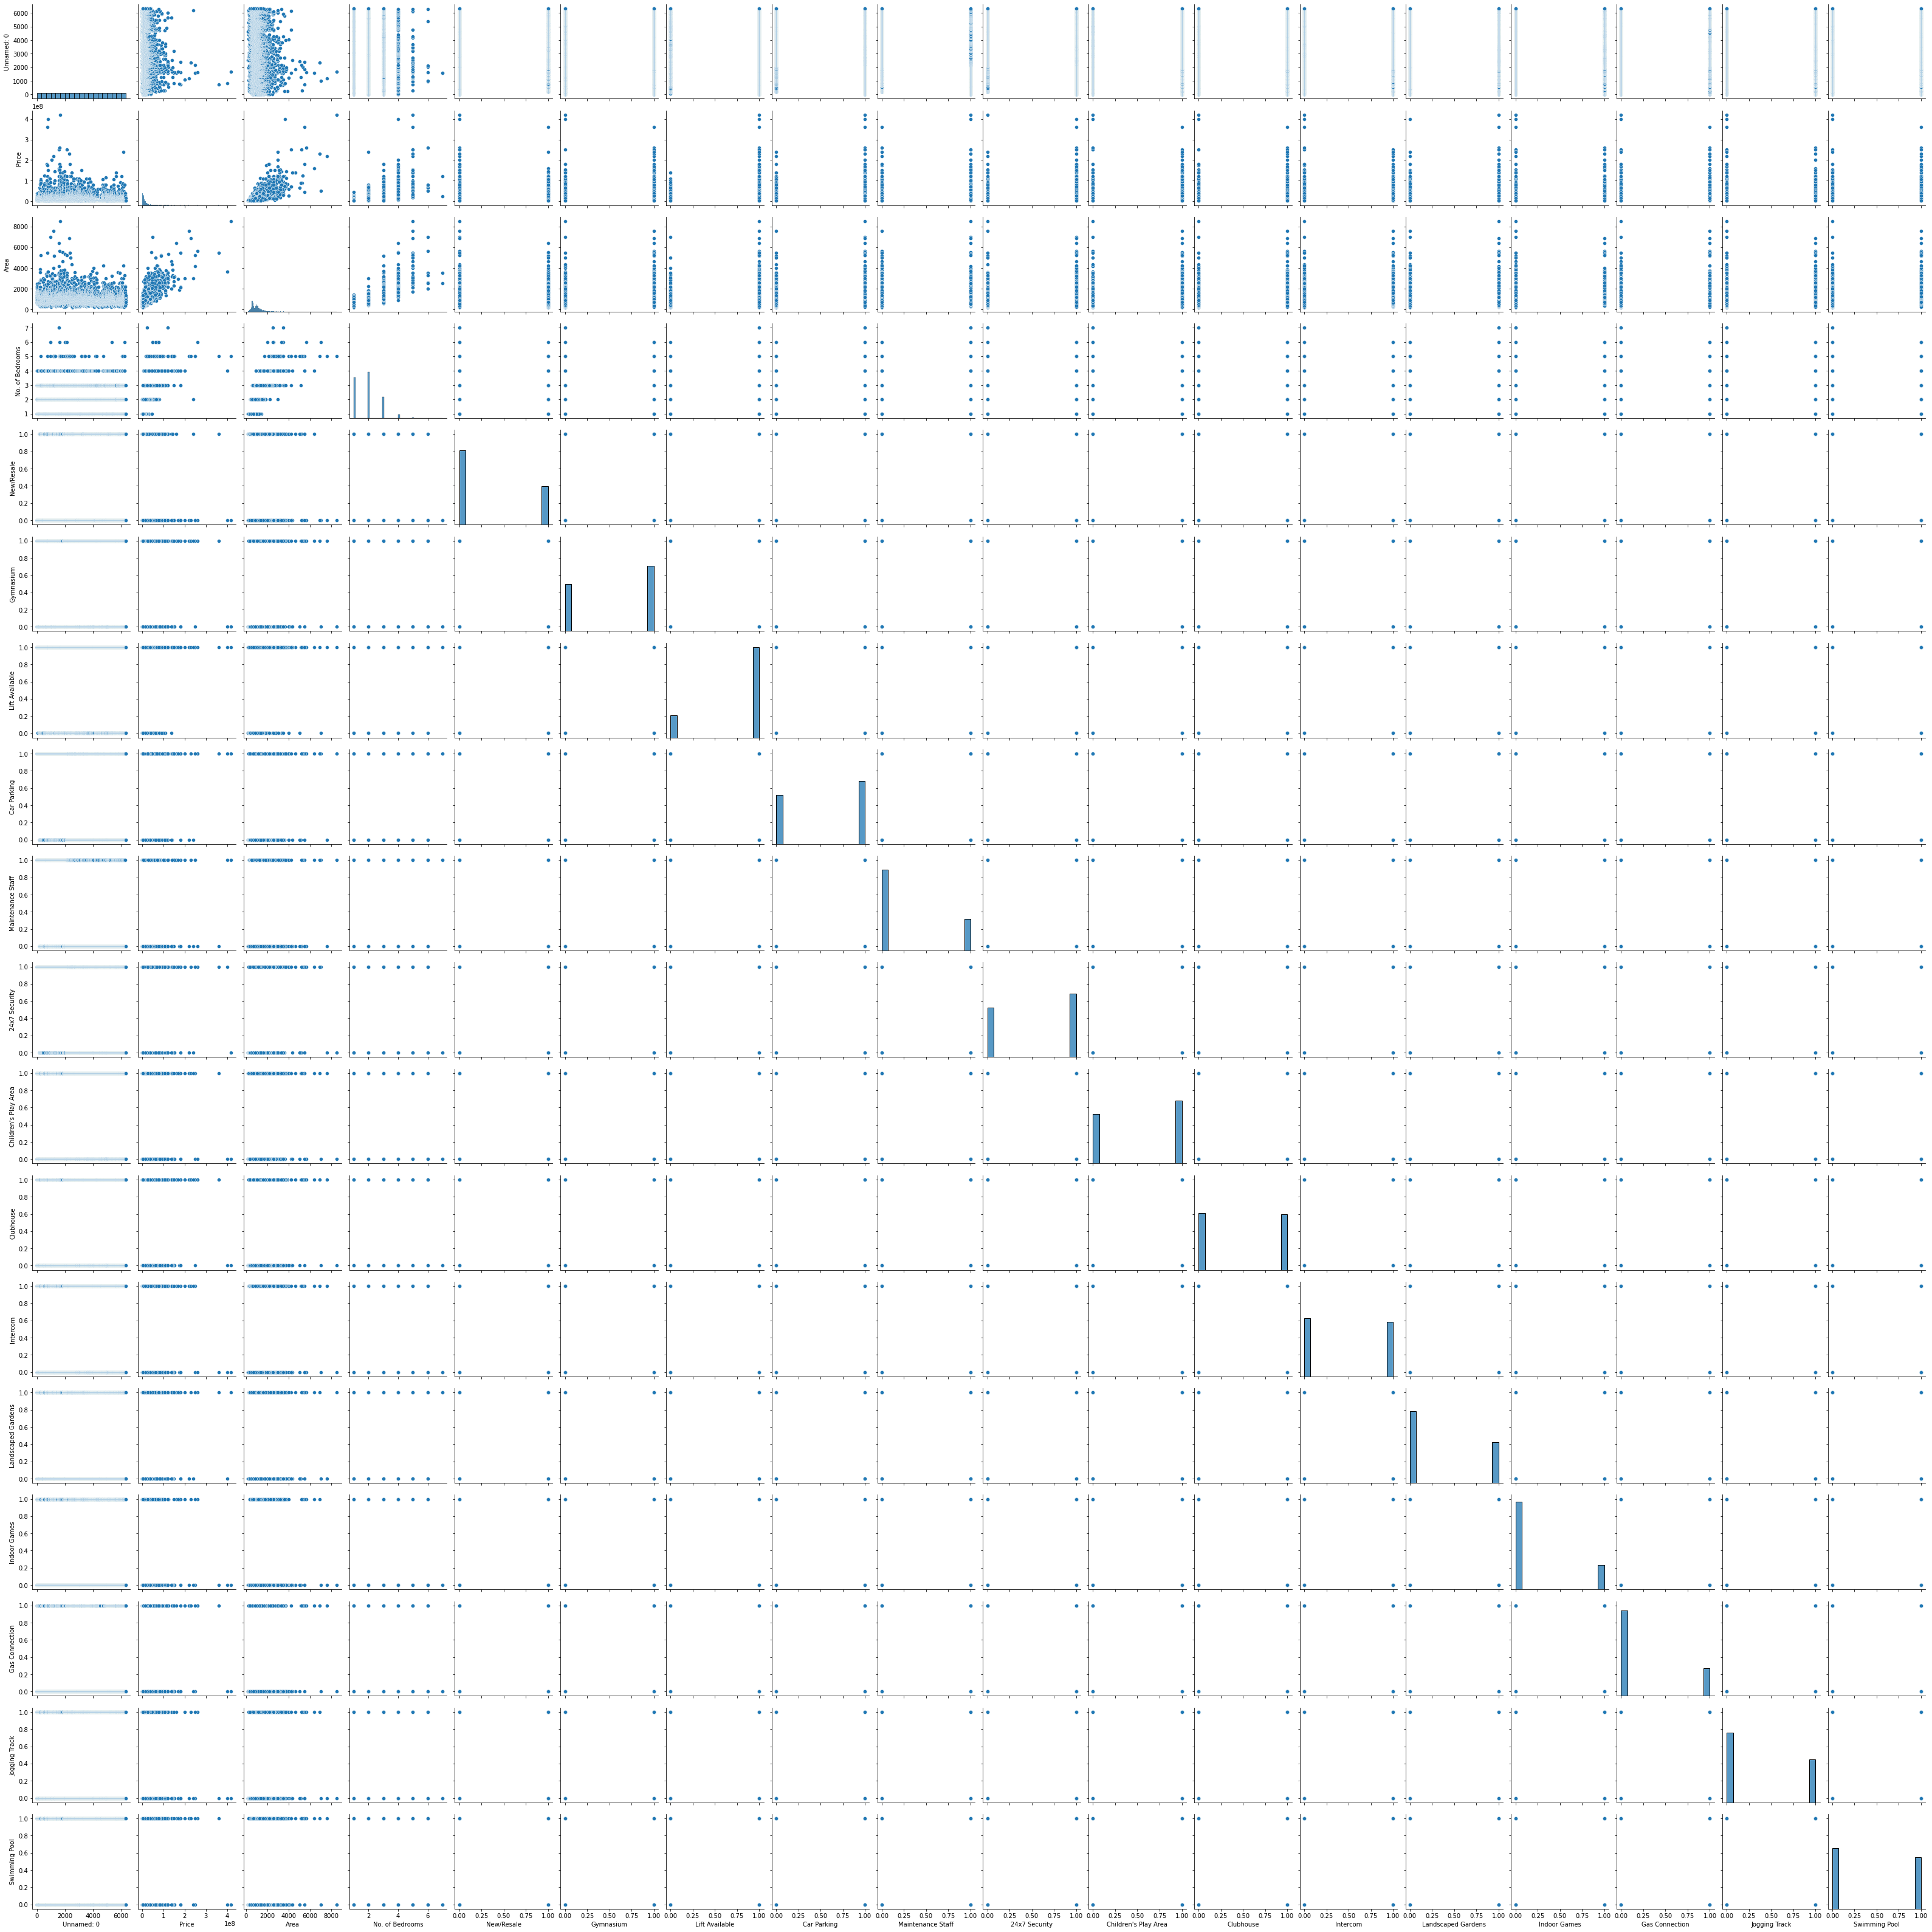

In [12]:
sns.pairplot(df)

In [13]:
px.scatter(df,x = 'Area',y = 'Price')

<AxesSubplot:xlabel='Area', ylabel='Price'>

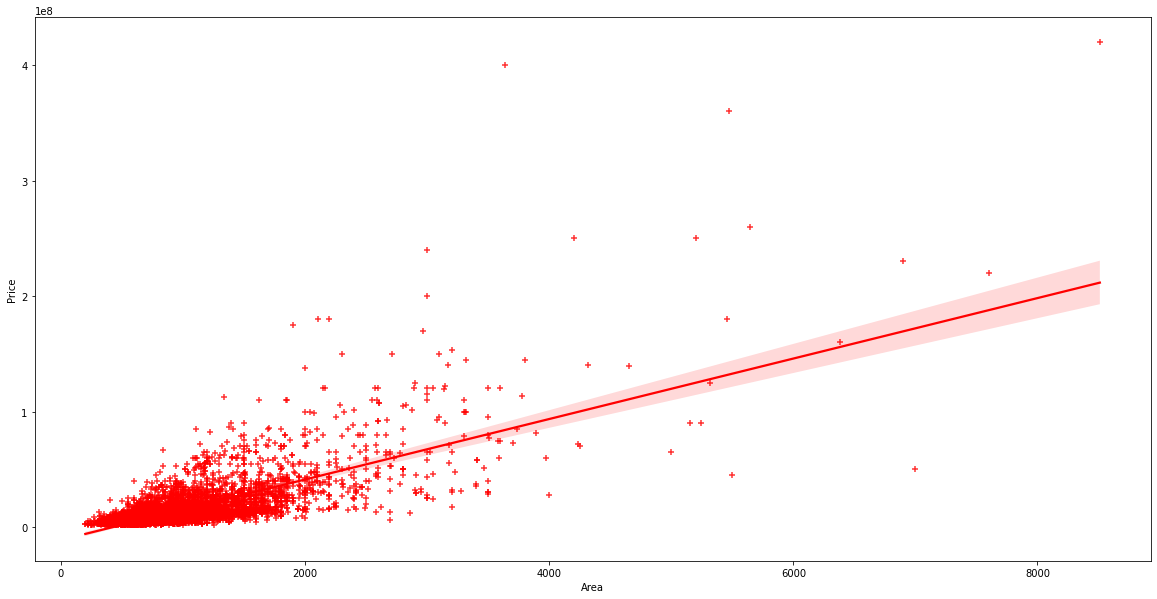

In [14]:
plt.figure(figsize = (20,10))
sns.regplot(data = df, x='Area', y='Price', marker = "+" ,color='red')

In [15]:
fig = px.histogram(df, 
                   x='Area', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Area')
fig.update_layout(bargap=0.1)
fig.show()

### HeatMap 

In [16]:
df.corr()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
Unnamed: 0,1.000000,-0.074733,-0.111959,-0.064130,0.134172,0.024925,-0.006600,-0.393617,-0.542451,-0.386250,0.250822,0.110686,0.158164,-0.035881,0.052872,0.142827,0.041818,0.086168
Price,-0.074733,1.000000,0.722336,0.594865,0.032428,0.098097,0.083656,0.055221,0.027604,0.045107,0.045126,0.084775,0.063060,0.082225,0.122352,0.118245,0.042325,0.123902
Area,-0.111959,0.722336,1.000000,0.812692,0.028197,0.198772,0.112241,0.124060,0.091590,0.110156,0.107132,0.181121,0.145060,0.117309,0.151458,0.094251,0.121099,0.209696
No. of Bedrooms,-0.064130,0.594865,0.812692,1.000000,0.099334,0.227887,0.104163,0.110182,0.047762,0.097672,0.113734,0.203105,0.144554,0.127684,0.175645,0.061616,0.126929,0.234695
New/Resale,0.134172,0.032428,0.028197,0.099334,1.000000,0.243751,0.105422,-0.024795,-0.235167,-0.002695,0.278907,0.269434,0.232293,0.196307,0.290162,-0.029659,0.227498,0.276606
Gymnasium,0.024925,0.098097,0.198772,0.227887,0.243751,1.000000,0.420770,0.332707,0.017514,0.382928,0.552648,0.756068,0.490203,0.423149,0.410831,0.098228,0.564443,0.722224
Lift Available,-0.006600,0.083656,0.112241,0.104163,0.105422,0.420770,1.000000,0.259843,0.039136,0.258250,0.423847,0.407903,0.425870,0.280011,0.195335,0.205629,0.327393,0.341265
Car Parking,-0.393617,0.055221,0.124060,0.110182,-0.024795,0.332707,0.259843,1.000000,0.513232,0.805328,0.087365,0.282532,0.110477,0.417677,0.281009,-0.101906,0.467630,0.284575
Maintenance Staff,-0.542451,0.027604,0.091590,0.047762,-0.235167,0.017514,0.039136,0.513232,1.000000,0.477914,-0.190507,-0.041616,-0.088927,0.115207,0.026861,-0.111239,-0.011001,-0.078456
24x7 Security,-0.386250,0.045107,0.110156,0.097672,-0.002695,0.382928,0.258250,0.805328,0.477914,1.000000,0.141747,0.332720,0.151153,0.436198,0.319371,-0.101166,0.539561,0.332387


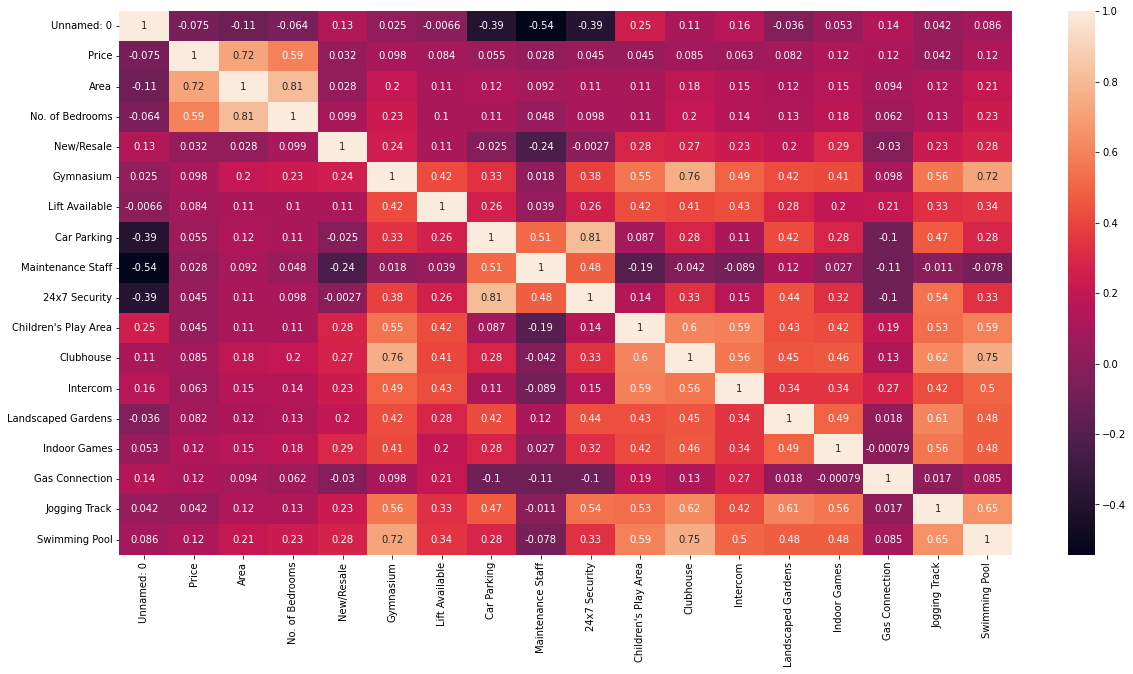

In [17]:
#Setting Figure Size
plt.figure(figsize=(20, 10))
# setting the parameter values
annot = True
# plotting the heatmap
sns.heatmap(df.corr(),annot=annot) 
# displaying the plotted heatmap
plt.show()

### Price has maximum correlation with Area of the flat : 0.72

## Step 2 - Prepare the Dataset for Training
<img src="https://806230.smushcdn.com/1739487/wp-content/uploads/2021/04/train-and-test-1-min-1.png?lossy=0&strip=1&webp=1" width="480">

In [18]:
X = np.array(df.Area)
X = X.reshape(-1, 1)

In [19]:
y = np.array(df.Price)
y = y.reshape(-1, 1)

## 1.) Single Feature

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)

In [21]:
print(f'X_test : {X_train.shape} y_test : {y_train.shape}')
print(f'X_test : {X_test.shape} y_test : {y_test.shape}')
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(X_test)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_test : (5712, 1) y_test : (5712, 1)
X_test : (635, 1) y_test : (635, 1)


## Step-3 Train Linear Regression Model
<img src="https://i.imgur.com/iTM2s5k.png" width="480">

In [22]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)

0.5218094301053282

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

,model,best_score,best_params
0,linear_regression,0.526979,{'normalize': True}
1,lasso,0.526979,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.343296,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## 2.) Multiple Feature

## Step 4 - Make Predictions and Evaluate Your Model

## Step 5 - Saving the model

## Step 6 - Pickle File of Model